In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Concatenate, Input, Conv2D, MaxPooling2D, Reshape, Conv2DTranspose, concatenate, BatchNormalization
np.random.seed(42)
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split

from keras import backend as K

from getdata import get_data
from models import *

In [2]:
images, masks = get_data()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images.numpy(), masks.numpy(), random_state=42)

In [ ]:
def dice_coef(y_true, y_pred, smooth=0.0001):
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

def dice_coef_loss(y_true, y_pred):
  return 1 - dice_coef(y_true, y_pred)

lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
   boundaries = [1400, 5000], 
   values = [1e-4, 1e-4, 1e-5]
)

In [4]:
model = unet()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

with tf.device('/device:gpu:0'):
    training = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

model = simple_unet()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

with tf.device('/device:gpu:0'):
    training_simple = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

model = unet_dropout()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

with tf.device('/device:gpu:0'):
    training_dropout = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

model = unet_batchnormalization()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

with tf.device('/device:gpu:0'):
    training_batchnormalization = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 13s 282ms/step - loss: 0.6456 - accuracy: 0.6900 - val_loss: 0.5786 - val_accuracy: 0.7282
Epoch 2/100
27/27 [==============================] - 7s 268ms/step - loss: 0.5951 - accuracy: 0.7082 - val_loss: 0.5773 - val_accuracy: 0.7282
Epoch 3/100
27/27 [==============================] - 7s 265ms/step - loss: 0.5897 - accuracy: 0.7082 - val_loss: 0.5701 - val_accuracy: 0.7282
Epoch 4/100
27/27 [==============================] - 7s 248ms/step - loss: 0.5755 - accuracy: 0.7082 - val_loss: 0.5719 - val_accuracy: 0.7282
Epoch 5/100
27/27 [==============================] - 7s 246ms/step - loss: 0.5618 - accuracy: 0.7082 - val_loss: 0.5733 - val_accuracy: 0.7282
Epoch 6/100
27/27 [==============================] - 7s 270ms/step - loss: 0.5414 - accuracy: 0.7073 - val_loss: 0.5166 - val_accuracy: 0.7209
Epoch 7/100
27/27 [==============================] - 7s 266ms/step - loss: 0.5043 - accuracy: 0.7109 - val_loss: 0.5466 - val_accuracy: 0.721

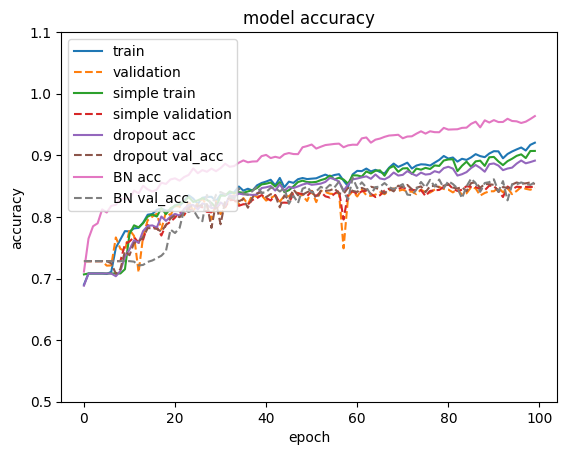

In [8]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'], '--')
plt.plot(training_simple.history['accuracy'])
plt.plot(training_simple.history['val_accuracy'], '--')
plt.plot(training_dropout.history['accuracy'])
plt.plot(training_dropout.history['val_accuracy'], '--')
plt.plot(training_batchnormalization.history['accuracy'])
plt.plot(training_batchnormalization.history['val_accuracy'], '--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'simple train', 'simple validation', 'dropout acc', 'dropout val_acc', 'BN acc', 'BN val_acc'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

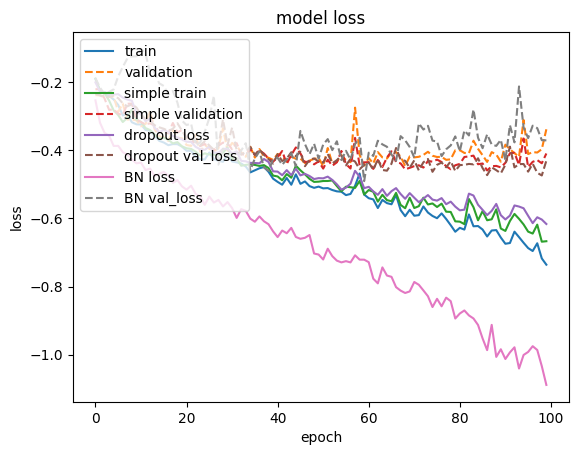

In [9]:
plt.plot(np.log10(training.history['loss']))
plt.plot(np.log10(training.history['val_loss']), '--')
plt.plot(np.log10(training_simple.history['loss']))
plt.plot(np.log10(training_simple.history['val_loss']), '--')
plt.plot(np.log10(training_dropout.history['loss']))
plt.plot(np.log10(training_dropout.history['val_loss']), '--')
plt.plot(np.log10(training_batchnormalization.history['loss']))
plt.plot(np.log10(training_batchnormalization.history['val_loss']), '--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'simple train', 'simple validation', 'dropout loss', 'dropout val_loss', 'BN loss', 'BN val_loss'], loc='upper left')
#plt.ylim([0.5,1.1])
plt.show()